## Appearance: Axes, Tricks and Grids

### The Canvas: Axis Limits and aspect

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math


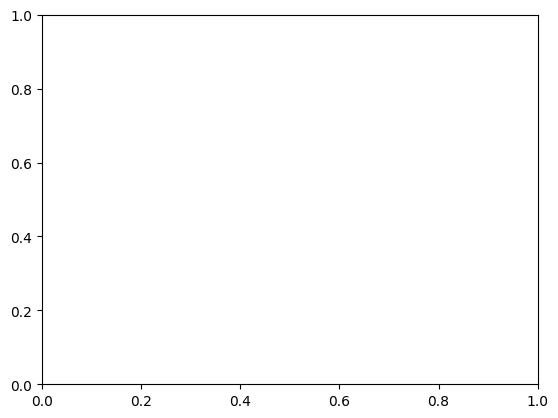

In [3]:
# Start from the most basic figure
fig, ax = plt.figure(), plt.axes()

See that the default canvas has not ratio 1 (squared). We can define `figsize` for the figure and axes dimensions but we can also use `set_aspect` method.

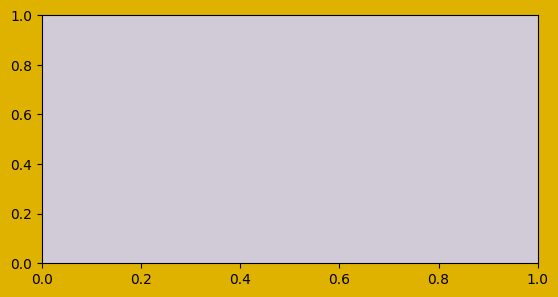

In [7]:
fig, ax = plt.figure(facecolor='#DFB200'), plt.axes(facecolor='#D1CBD7')
# ax.set_aspect('equal')
ax.set_aspect(0.5)

Usually we leave matplotlib to define the limits of the axes. (Calculated based on the data we pass trough) But it is possible to define them:
* `set_xlim()`
* `set_ylim()`

👁️ Messing around with this limits can make data dissapear.<br>
We can also retrieve those automate limits by using this methods:
* `get_xlim()`
* `get_ylim()`

Le us play around with this methods, creating colour filled areas with `fill_between()` method.

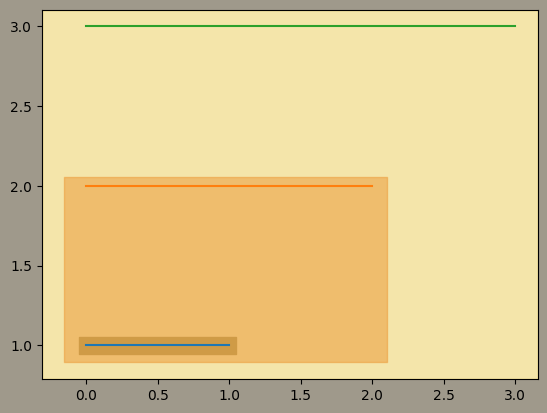

In [23]:
fig, ax = plt.figure(facecolor='#9F998B'), plt.axes()
colors_list = ['#9F998B','#F2884B','#DFB200','#D1CBD7']

for i in range(1,4):
  j = i -1
  ax.plot([0,i],[i,i])
  bottom_y, top_y = ax.get_ylim()
  left_x, right_x = ax.get_xlim()
  ax.fill_between(x=[left_x,right_x],
                  y1 = bottom_y,
                  y2 = top_y,
                  alpha = 1/i,
                  color=colors_list[j])

# The last iteration stretches automatically limits
# Avoid it
ax.set_ylim(bottom_y, top_y)
ax.set_xlim(left_x,right_x); # ; eliminates the numbers and text in the console

In case we need to, we can make our plot elements to break past the limits of the axes. Inside the function `ax.plot()` we can toggle `clip_on = False`. This argument controls how the objects behave respect the limits.

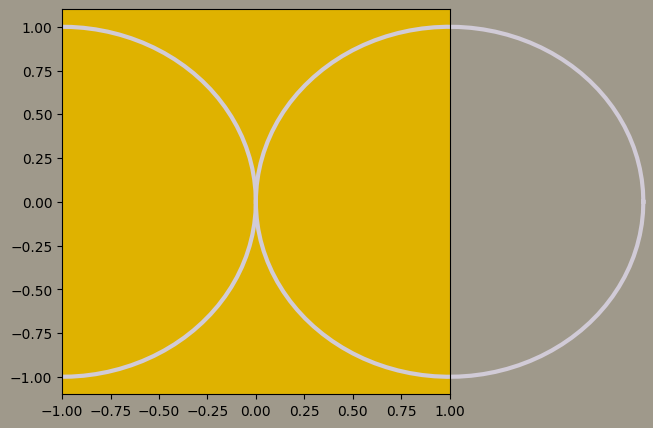

In [28]:
fig, ax = plt.figure(figsize=(5,5), facecolor='#9F998B'), plt.axes(facecolor='#DFB200')

# Create a circle
u = np.linspace(0,2*np.pi, 100)
x = np.cos(u)
y = np.sin(u)

ax.plot(x-1,y,color='#D1CBD7', linewidth=3)
ax.plot(x+1,y,color='#D1CBD7', linewidth=3, clip_on=False)

ax.set_xlim(-1,1); # Force the circle to be out the limits


In this case you can see that the figure container adapts itself to the data. Even if we set the figsize previuosly. But the axis limits remain set as (-1,1)

### Spines: Axis Lines and Labels

We, of course, can change (even make disappear) the lines that define axis.
With `ax.axis('off')` we just eliminate everything but the figure

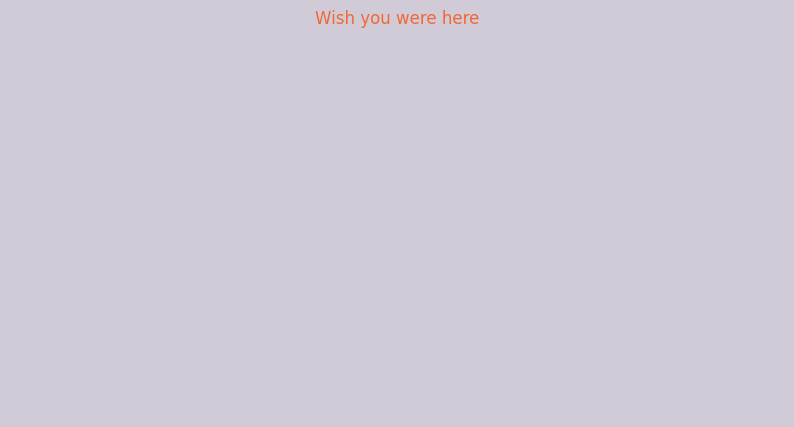

In [32]:
fig, ax = plt.figure(figsize=(10,5), facecolor='#D1CBD7'), plt.axes(facecolor='#DFB200')
ax.set_title('Wish you were here', color='#F26835')
ax.axis('off');